```
@beelzebruno
2022
```

In [1]:
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

plt.style.use('seaborn')

## Dynamic List

In [2]:
class Node:
    """ A node is a element on a list. """
    def __init__(self, data, next_node=None):
        self.data = data
        self.next_node = next_node

    def __repr__(self):
        return f'Node {self.data}'
        
    def __len__(self):
        """ The node length is equal him plus his nexts nodes """
        return 1 + len(self.next_node) if self.next_node else 1


class List:
    """ A list is a collection of nodes. """
    def __init__(self, root=None):
        self.root = root

    def __len__(self):
        """ List length is the total of nodes. """
        return len(self.root) if self.root else 0

    def show(self):
        """ Return list content """
        result = []
        if len(self) == 0:
            return result

        node = self.root
        while node is not None:
            result.append(node.data)
            node = node.next_node
        return result

    def insert(self, value):
        """
        Inserts a new value in the list.
        A new node will be created automatically.
        """
        if len(self) == 0:
            self.root = Node(value)
            return self.root

        node = self.root
        while node.next_node is not None:
            node = node.next_node
        node.next_node = Node(value)

        return node.next_node

    def remove(self, data):
        """
        Removes a node which data is equal received argument.
        """
        if len(self) == 0:
            raise Exception('Cant remove from empty list.')

        node = self.root
        previous = None
        while node is not None:
            next_node = node.next_node

            if node.data == data:
                if previous is None:
                    self.root = next_node
                    del node
                    return self.show()
                previous.next_node = next_node
                del node
                return self.show()
            previous = node
            node = next_node
        raise Exception('Data not found in list values.')


In [3]:
# Driver code
node = Node('root', Node('A', Node('B', Node('C'))))
l = List(node)

pd.DataFrame([
    ['show', l.show(), len(l)],
    ['insert D', l.insert('D'), len(l)],
    ['show', l.show(), len(l)],
    ['remove A', l.remove('A'), len(l)]
], columns=['Action', 'Output', 'Length'])

,Action,Output,Length
0,show,"[root, A, B, C]",4
1,insert D,Node D,5
2,show,"[root, A, B, C, D]",5
3,remove A,"[root, B, C, D]",4


# Binary Tree

In [4]:
class TreeNode:
    def __init__(self, value, left=None, right=None, origin=None):
        self.value = value
        self.left = left
        self.right = right
        self.origin = origin

    def __len__(self):
        rlen = len(self.right) if self.right is not None else 0
        llen = len(self.left) if self.left is not None else 0
        return 1 + rlen + llen

class Tree:
    def __init__(self, root=None):
        self.root = root

    def __len__(self):
        return len(self.root) if self.root is not None else 0

    def show(self, strategy):
        result = []
        if len(self) == 0:
            return result
        if strategy == 'bfs':
            return self.breadth_first()
        elif strategy == 'dfs':
            return self.depth_first()

    def breadth_first(self):
        queue = [self.root]
        results = []
        for _ in range(len(self)):
            node = queue.pop(0)
            results.append(node.value)
            if node.left is not None:
                queue.append(node.left)
            if node.right is not None:
                queue.append(node.right)
            if not queue:
                break
        return results

    def depth_first(self):
        queue = [self.root]
        results = []
        for _ in range(len(self)):
            node = queue.pop(-1)
            results.append(node.value)
            if node.left is not None:
                queue.append(node.left)
            if node.right is not None:
                queue.append(node.right)
            if not queue:
                break
        return results

    def insert(self, value, side, origin):
        node = TreeNode(value, origin=origin)
        if side == 'left':
            origin.left = node
        elif side == 'right':
            origin.right = node


In [5]:
# Driver code
root_node = TreeNode('root')
tree = Tree(root_node)
tree.insert('A', 'left', tree.root)
tree.insert('B', 'right', tree.root)
tree.insert('C', 'left', tree.root.left)

pd.DataFrame([
    [len(tree), tree.show('bfs'), tree.show('dfs')],
], columns=['Length', 'bfs', 'dfs'])

,Length,bfs,dfs
0,4,"[root, A, B, C]","[root, B, A, C]"


# Sorting

In [6]:
sample_lengths = (8, 10, 12, 50, 100, 300, 600, 800, 1000, 3000, 6000, 8000, 12000)
sample_vectors = [[randint(1, 1000) for _ in range(length)] for length in sample_lengths]

# sample_vector = [randint(1, 100) for _ in range(10)]
# sample_vector2 = [randint(1, 100) for _ in range(8)]
# sample_vector3 = [randint(1, 100) for _ in range(12)]
# sample_vector4 = [randint(1, 100) for _ in range(1000)]

### Selection sort

In [7]:
def selection_sort(vector):
    v = vector.copy()  # make a copy so we dont change the original vector
    length = len(v)
    count = 0  # counts the computational effort

    for i in range(length):
        lower = i
        for j in range(i+1, length):
            # if next value is lower then it bacame the lower value reference
            if v[j] < v[lower]:
                lower = j
            count += 1  # increment complexity counter

        # swap values
        if i != lower:
            v[i], v[lower] = v[lower], v[i]

    return v, count

In [8]:
# Driver code
results = [selection_sort(sample) for sample in sample_vectors]
data = [[len(sample), result[1], sample, result[0]]
        for sample, result in zip(sample_vectors, results)]

selection_sort_df = pd.DataFrame(
    data,
    columns=['Vector length', 'Effort', 'Input', 'Output']
)
selection_sort_df

,Vector length,Effort,Input,Output
0,8,28,"[549, 148, 291, 839, 657, 104, 201, 398]","[104, 148, 201, 291, 398, 549, 657, 839]"
1,10,45,"[592, 161, 461, 47, 197, 332, 501, 78, 59, 260]","[47, 59, 78, 161, 197, 260, 332, 461, 501, 592]"
2,12,66,"[849, 834, 313, 803, 883, 853, 283, 69, 924, 8...","[69, 139, 283, 287, 313, 801, 803, 834, 849, 8..."
3,50,1225,"[490, 908, 180, 520, 108, 798, 886, 232, 796, ...","[14, 56, 79, 100, 106, 108, 108, 133, 157, 173..."
4,100,4950,"[663, 283, 5, 139, 576, 629, 46, 28, 784, 757,...","[5, 8, 14, 28, 46, 57, 69, 80, 86, 99, 109, 11..."
5,300,44850,"[667, 854, 93, 242, 600, 739, 835, 143, 318, 6...","[6, 11, 19, 22, 24, 25, 32, 39, 40, 43, 44, 45..."
6,600,179700,"[148, 298, 613, 307, 479, 305, 501, 630, 550, ...","[2, 2, 4, 5, 6, 8, 8, 9, 10, 10, 11, 12, 12, 1..."
7,800,319600,"[362, 123, 316, 204, 481, 20, 884, 934, 864, 3...","[5, 8, 8, 9, 9, 10, 11, 12, 12, 13, 14, 16, 18..."
8,1000,499500,"[566, 381, 58, 102, 801, 85, 786, 169, 601, 30...","[1, 1, 2, 3, 3, 3, 4, 6, 6, 7, 11, 13, 13, 13,..."
9,3000,4498500,"[263, 551, 873, 258, 510, 678, 841, 79, 146, 6...","[2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, ..."


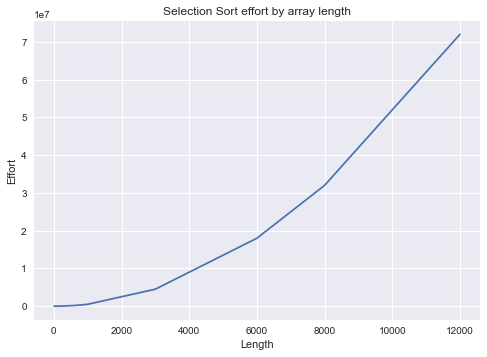

In [9]:
y = selection_sort_df['Effort'].values
x = selection_sort_df['Vector length'].values

plt.plot(x, y)
plt.title('Selection Sort effort by array length')
plt.xlabel('Length')
plt.ylabel('Effort')
plt.show()

## Insertion sort

In [10]:
def insertion_sort(vector):
    vec = vector.copy()
    length = len(vec)
    count = 0
    for i in range(1, length):
        j = i
        while (vec[j] < vec[j - 1]) and (j != 0):
            vec[j], vec[j - 1] = vec[j - 1], vec[j]
            j -= 1
            count += 1
    return vec, count

In [11]:
# Driver code
results = [insertion_sort(sample) for sample in sample_vectors]
data = [[len(sample), result[1], sample, result[0]]
        for sample, result in zip(sample_vectors, results)]

insertion_sort_df = pd.DataFrame(
    data,
    columns=['Vector length', 'Effort', 'Input', 'Output']
)
insertion_sort_df

,Vector length,Effort,Input,Output
0,8,15,"[549, 148, 291, 839, 657, 104, 201, 398]","[104, 148, 201, 291, 398, 549, 657, 839]"
1,10,27,"[592, 161, 461, 47, 197, 332, 501, 78, 59, 260]","[47, 59, 78, 161, 197, 260, 332, 461, 501, 592]"
2,12,42,"[849, 834, 313, 803, 883, 853, 283, 69, 924, 8...","[69, 139, 283, 287, 313, 801, 803, 834, 849, 8..."
3,50,607,"[490, 908, 180, 520, 108, 798, 886, 232, 796, ...","[14, 56, 79, 100, 106, 108, 108, 133, 157, 173..."
4,100,2120,"[663, 283, 5, 139, 576, 629, 46, 28, 784, 757,...","[5, 8, 14, 28, 46, 57, 69, 80, 86, 99, 109, 11..."
5,300,23576,"[667, 854, 93, 242, 600, 739, 835, 143, 318, 6...","[6, 11, 19, 22, 24, 25, 32, 39, 40, 43, 44, 45..."
6,600,90471,"[148, 298, 613, 307, 479, 305, 501, 630, 550, ...","[2, 2, 4, 5, 6, 8, 8, 9, 10, 10, 11, 12, 12, 1..."
7,800,170042,"[362, 123, 316, 204, 481, 20, 884, 934, 864, 3...","[5, 8, 8, 9, 9, 10, 11, 12, 12, 13, 14, 16, 18..."
8,1000,240902,"[566, 381, 58, 102, 801, 85, 786, 169, 601, 30...","[1, 1, 2, 3, 3, 3, 4, 6, 6, 7, 11, 13, 13, 13,..."
9,3000,2224915,"[263, 551, 873, 258, 510, 678, 841, 79, 146, 6...","[2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, ..."


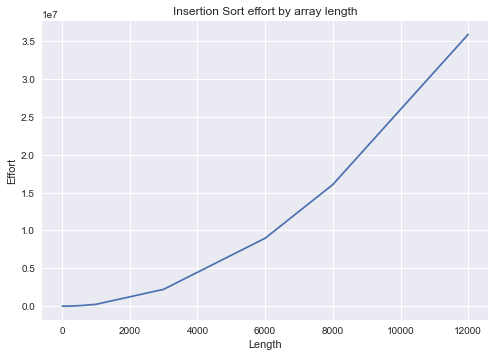

In [12]:
y = insertion_sort_df['Effort'].values
x = insertion_sort_df['Vector length'].values

plt.plot(x, y)
plt.title('Insertion Sort effort by array length')
plt.xlabel('Length')
plt.ylabel('Effort')
plt.show()

## Shell sort

In [31]:
def shell_sort(vector, gap=3):
    if gap < 1:
        raise Exception('Gap must bu higher than 1')
    v = vector.copy()
    length = len(v)
    gap = length // gap
    count = 0
    
    while gap > 0:

        for initial in range(gap):
            for i in range(initial+gap, length, gap):
                value = v[i]
                cursor = i

                while cursor >= gap and v[cursor-gap] > value:
                    v[cursor] = v[cursor-gap]
                    cursor = cursor - gap
                    count += 1
                v[cursor] = value
        gap -= 1
    return v, count


In [32]:
# Driver code
results = [shell_sort(sample) for sample in sample_vectors]
data = [[len(sample), result[1], sample, result[0]]
        for sample, result in zip(sample_vectors, results)]

shell_sort_df = pd.DataFrame(
    data,
    columns=['Vector length', 'Effort', 'Input', 'Output']
)
shell_sort_df

,Vector length,Effort,Input,Output
0,8,11,"[549, 148, 291, 839, 657, 104, 201, 398]","[104, 148, 201, 291, 398, 549, 657, 839]"
1,10,15,"[592, 161, 461, 47, 197, 332, 501, 78, 59, 260]","[47, 59, 78, 161, 197, 260, 332, 461, 501, 592]"
2,12,20,"[849, 834, 313, 803, 883, 853, 283, 69, 924, 8...","[69, 139, 283, 287, 313, 801, 803, 834, 849, 8..."
3,50,115,"[490, 908, 180, 520, 108, 798, 886, 232, 796, ...","[14, 56, 79, 100, 106, 108, 108, 133, 157, 173..."
4,100,440,"[663, 283, 5, 139, 576, 629, 46, 28, 784, 757,...","[5, 8, 14, 28, 46, 57, 69, 80, 86, 99, 109, 11..."
5,300,3314,"[667, 854, 93, 242, 600, 739, 835, 143, 318, 6...","[6, 11, 19, 22, 24, 25, 32, 39, 40, 43, 44, 45..."
6,600,9049,"[148, 298, 613, 307, 479, 305, 501, 630, 550, ...","[2, 2, 4, 5, 6, 8, 8, 9, 10, 10, 11, 12, 12, 1..."
7,800,17436,"[362, 123, 316, 204, 481, 20, 884, 934, 864, 3...","[5, 8, 8, 9, 9, 10, 11, 12, 12, 13, 14, 16, 18..."
8,1000,22496,"[566, 381, 58, 102, 801, 85, 786, 169, 601, 30...","[1, 1, 2, 3, 3, 3, 4, 6, 6, 7, 11, 13, 13, 13,..."
9,3000,122178,"[263, 551, 873, 258, 510, 678, 841, 79, 146, 6...","[2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, ..."


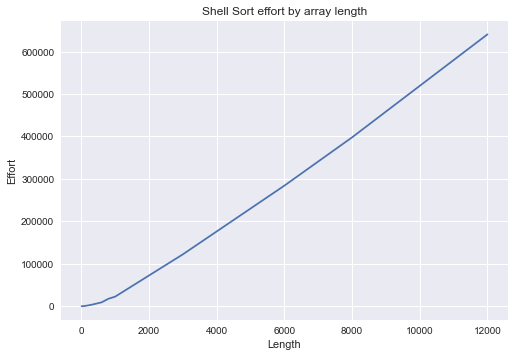

In [33]:
y = shell_sort_df['Effort'].values
x = shell_sort_df['Vector length'].values

plt.plot(x, y)
plt.title('Shell Sort effort by array length')
plt.xlabel('Length')
plt.ylabel('Effort')
plt.show()

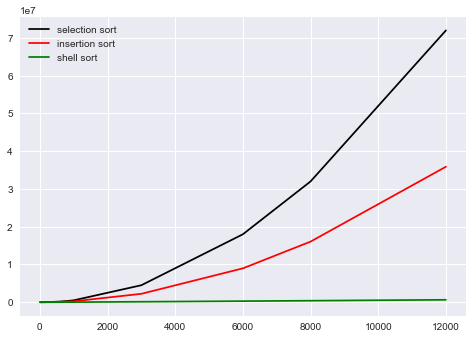

In [34]:
y = selection_sort_df['Effort'].values
x = selection_sort_df['Vector length'].values
plt.plot(x, y, color='black', label='selection sort')

y = insertion_sort_df['Effort'].values
x = insertion_sort_df['Vector length'].values
plt.plot(x, y, color='red', label='insertion sort')

y = shell_sort_df['Effort'].values
x = shell_sort_df['Vector length'].values
plt.plot(x, y, color='green', label='shell sort')
plt.legend()
plt.show()